In [65]:
# Standard Libraries
import os  # For path handling
import numpy as np  # Numerical computations
import pandas as pd  # Data handling
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Visualization
import warnings  # To handle warnings

# Scikit-learn Libraries (for machine learning)
from sklearn.model_selection import (
    train_test_split, KFold, RandomizedSearchCV
)
from sklearn.preprocessing import (
    LabelEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor,
    GradientBoostingRegressor
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import (
    DecisionTreeClassifier, DecisionTreeRegressor
)
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Scikit-learn Metrics
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score, 
    confusion_matrix, classification_report
)

# Other Libraries
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from xgboost import XGBRegressor


# Machine Learning for German Real Estate Price Prediction

This project analyzes a real estate dataset from various regions in Germany, focusing on features such as base rent, total rent, living space, property condition, number of rooms, and floor information. The goal is to apply a variety of machine learning techniques to gain insights into the housing market and predict key attributes of properties. Specifically, the project involves tasks such as predicting whether a flat has a lift, forecasting base rent, and classifying properties based on rental price and condition. Several machine learning algorithms, including classification, regression, and clustering, are used to tackle these challenges. Additionally, preprocessing steps like scaling, imputation, and dimensionality reduction (PCA) are applied to prepare the data for modeling. By the end of the project, various models will be evaluated for their ability to provide accurate predictions and useful insights into the real estate market.

<b>Stage - 1 Load Data and Preprocessing</b> <br><br> 1.1 Load Data from .csv Source <br> 1.2 Remove Unuseful Columns <br> 1.3 Removing Rows Containing NaN <br> 1.4 Seeking and Removing Outliers <br> 1.5 Applying Label Encoding to Dataset <br> 1.6 Applying Min-Max Scaler to Dataset <br> 1.7 Applying Random Search to Find Best Value for K <br> 1.8 Apply KNN Imputer for Removing NaN <br> 1.9 Correlation Matrix for Analyzing Final Results <br><br>

<b>Stage 2 - Apply Machine Learning Models to Preprocessed Data</b>

<b>2.1 Classification Task - Predicting if a Flat has a Lift</b> <br><br> 2.1.1 Prepare Features, Scaling Features, Apply PCA <br> 2.1.2 Logistic Regression for Lift Problem <br> 2.1.3  Random Forest for Lift Problem  <br> 2.1.4 Gradient Boosting for Lift Problem<br> 2.1.5 Support Vector Machine for Lift Problem <br> 2.1.6 K-Nearest Neighbor for Lift Problem <br>

<b>2.2 Regression Task - Predicting Base Rent</b><br><br> 2.2.1 Prepare Features, Scaling Features, Apply PCA <br> 2.2.2 Linear Regression for Base Rent Prediction <br> 2.2.3 Random Forest for Predicting Base Rent <br> 2.2.4 Gradient Boosting with Polynomial Features for Predicting Base Rent <br> 2.2.5 XGBoost for Predicting Base Rent <br> 2.2.6 Support Vector Regression for Predicting Base Rent 

<b>2.3 Clustering Tasks</b><br><br> 2.3.1 Elbow Method for Optimal K <br> 2.3.2 Customer Segmentation for Rental Properties - Budget, Mid-Range and Luxury <br> 2.3.3 Rental Price Segmentation - Budget, Mid-Range, and Luxury <br> 2.3.4 Property Age and Condition Clusters - Newer, Renovated and Older <br> 2.3.5 Amenities and Facilities Clusters - Minimal, Modern and Luxory<br>


<div style="background-color: #f3ca20; color: #000000; font-size: 24px; padding: 10px;">Stage - 1 Load Data and Pre Procesing

Original Data URL

In [ ]:
#https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany

<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.1 Load Data from .csv Source
</div>

### Dataset Overview

The dataset consists of **268,850 rows and 51 columns**, containing detailed information about real estate listings across Germany. Key columns include **service charge** (`serviceCharge`), **heating type** (`heatingType`), **balcony availability** (`balcony`), and **number of pictures** (`picturecount`). It also provides essential property features such as **living space** (`livingSpace`), **total rent** (`totalRent`), **number of floors** (`numberOfFloors`), and **condition** (`condition`), which describes the state of the property (e.g., "well-kept", "refurbished").

Additional columns provide insight into **property location** such as **street name** (`street`) and **floor number** (`floor`), as well as utilities like **heating costs** (`heatingCosts`) and **firing types** (`firingTypes`). The **year constructed** (`yearConstructed`) and **number of park spaces** (`noParkSpaces`) help assess the property's age and available parking. 

The dataset, loaded from a `.csv` file, offers a rich set of features for analysis, allowing for deeper exploration into rental prices, property features, and geographical patterns. This structured dataset is ideal for tasks like predictive modeling, clustering, and trend analysis in the real estate domain.



In [66]:
germany_re = pd.read_csv("Germany Real Estate2.csv")
germany_re['description_word_count'] = germany_re['description'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
germany_re['facilities_word_count'] = germany_re['facilities'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
germany_re

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date,description_word_count,facilities_word_count
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,45431,21,42
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Alles neu macht der Mai вЂ“ so kann es auch fГ...,NaN,NaN,NaN,2019.0,NaN,NaN,45431,217,0
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Der Neubau entsteht im Herzen der Dresdner Neu...,* 9 mВІ Balkon\n* Bad mit bodengleicher Dusche...,NaN,NaN,NaN,NaN,NaN,45584,91,63
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Abseits von LГ¤rm und Abgasen in Ihre neue Woh...,NaN,87.23,NaN,NaN,NaN,NaN,45431,20,0
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,45342,12,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,"Diese schГ¶ne, neuwertige Wohnung im Dachgesch...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,45342,27,5
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroГџer Balk...",NaN,NaN,2015.0,NaN,NaN,45431,14,6
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,gemГјtliche 4-Zimmer-Wohnung im Obergeschoss e...,"BГ¶den: Wohn-/Schlafbereich = Laminat, KГјche ...",NaN,NaN,2019.0,NaN,NaN,45342,32,45
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,"Neubau Erstbezug, gehobener Standard, alle Ein...","WГ¤nde:\nMalerВ­vlies, weiГџ gestrichen alterВ...",40.00,NO_INFORMATION,2019.0,NaN,NaN,45431,75,98


NaN by Category

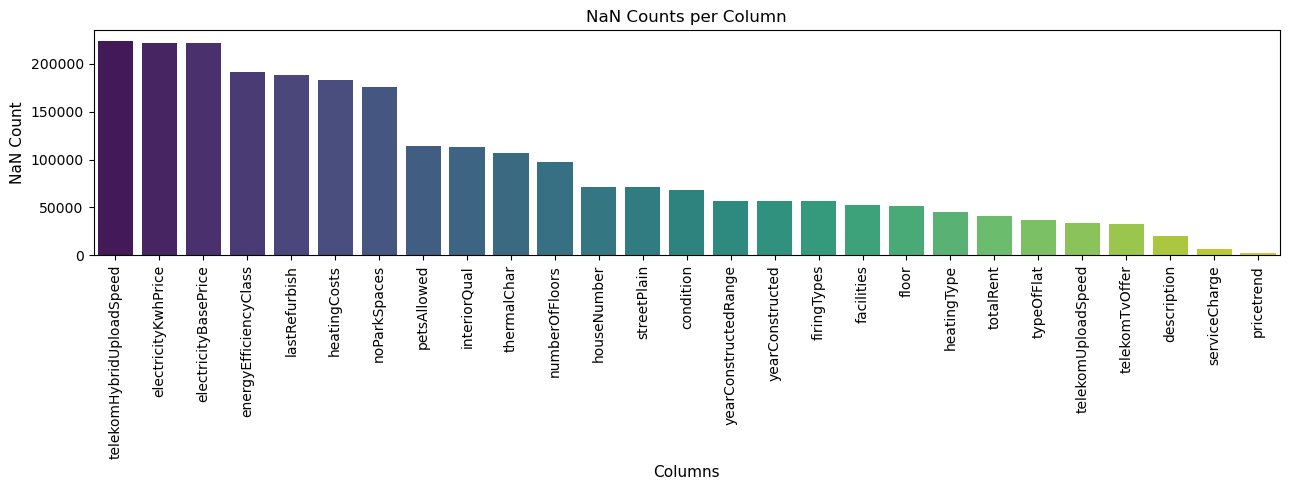

In [67]:
nan_counts = germany_re.isna().sum()
nan_counts_nonzero = nan_counts[nan_counts > 0]
nan_counts_df = pd.DataFrame(nan_counts_nonzero, columns=['NaN Count'])
nan_counts_df_sorted = nan_counts_df.sort_values(by='NaN Count', ascending=False)

plt.figure(figsize=(13, 5))
sns.barplot(x=nan_counts_df_sorted.index, y=nan_counts_df_sorted['NaN Count'], palette='viridis')

plt.title("NaN Counts per Column", fontsize=12)
plt.xlabel("Columns", fontsize=11)
plt.ylabel("NaN Count", fontsize=11)
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.2 Remove Unuseful 21 Columns

</div>

In [68]:
germany_re = germany_re.drop(['street', 'telekomHybridUploadSpeed', 'houseNumber', 'thermalChar', 'description', 'lastRefurbish' , 'electricityBasePrice', 'electricityKwhPrice', 'scoutId', 'facilities', 'newlyConst' , 'date', 'streetPlain', 'geo_plz', 'regio2','regio3', 'telekomTvOffer', 'regio1',  'geo_bln', 'energyEfficiencyClass', 'yearConstructedRange'], axis=1)
germany_re

,serviceCharge,heatingType,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count
0,245.00,central_heating,False,6,4.62,10.0,840.0,1965.0,1.0,oil,...,ground_floor,4.0,1.0,3.0,4,True,4,NaN,21,42
1,134.00,self_contained_central_heating,True,8,3.47,10.0,NaN,1871.0,2.0,gas,...,ground_floor,3.0,NaN,NaN,3,False,4,NaN,217,0
2,255.00,floor_heating,True,8,2.72,2.4,1300.0,2019.0,1.0,NaN,...,apartment,3.0,3.0,4.0,3,False,4,NaN,91,63
3,58.15,district_heating,True,9,1.53,40.0,NaN,1964.0,NaN,district_heating,...,other,3.0,3.0,NaN,3,False,2,87.23,20,0
4,138.00,self_contained_central_heating,True,19,2.46,NaN,903.0,1950.0,NaN,gas,...,apartment,3.0,1.0,NaN,3,False,4,NaN,12,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,90.00,heat_pump,True,0,2.74,10.0,910.0,2016.0,1.0,geothermal,...,roof_storey,3.0,NaN,NaN,3,False,4,NaN,27,5
268846,220.00,gas_heating,True,12,6.49,NaN,1150.0,1983.0,1.0,gas,...,apartment,3.5,1.0,1.0,3,False,5,NaN,14,6
268847,220.00,central_heating,True,21,2.90,40.0,930.0,1965.0,1.0,gas,...,apartment,4.0,1.0,2.0,4,True,4,NaN,32,45
268848,175.00,heat_pump,True,16,4.39,NaN,1015.0,2019.0,1.0,gas,...,apartment,2.0,NaN,5.0,2,False,3,40.00,75,98


NaN by Category

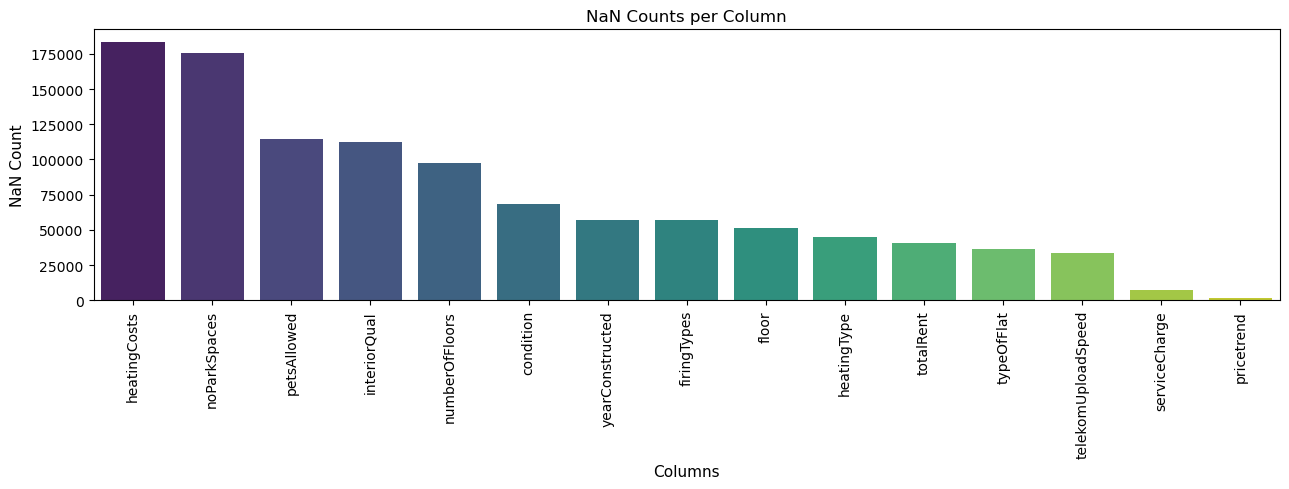

In [69]:
nan_counts = germany_re.isna().sum()
nan_counts_nonzero = nan_counts[nan_counts > 0]
nan_counts_df = pd.DataFrame(nan_counts_nonzero, columns=['NaN Count'])
nan_counts_df_sorted = nan_counts_df.sort_values(by='NaN Count', ascending=False)

plt.figure(figsize=(13, 5))
sns.barplot(x=nan_counts_df_sorted.index, y=nan_counts_df_sorted['NaN Count'], palette='viridis')

plt.title("NaN Counts per Column", fontsize=12)
plt.xlabel("Columns", fontsize=11)
plt.ylabel("NaN Count", fontsize=11)
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;">1.3 Removing Rows Contain more than 5 NaN 


</div>

This code filters the `germany_re` DataFrame to remove rows with more than 5 missing values, ensuring the dataset is more complete for analysis. The `isna().sum(axis=1)` function calculates the number of missing values in each row


In [70]:
germany_re = germany_re[germany_re.isna().sum(axis=1) <= 5]
germany_re

,serviceCharge,heatingType,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count
0,245.0,central_heating,False,6,4.62,10.0,840.0,1965.0,1.0,oil,...,ground_floor,4.0,1.0,3.0,4,True,4,NaN,21,42
1,134.0,self_contained_central_heating,True,8,3.47,10.0,NaN,1871.0,2.0,gas,...,ground_floor,3.0,NaN,NaN,3,False,4,NaN,217,0
2,255.0,floor_heating,True,8,2.72,2.4,1300.0,2019.0,1.0,NaN,...,apartment,3.0,3.0,4.0,3,False,4,NaN,91,63
8,110.0,oil_heating,False,5,3.77,40.0,690.0,1970.0,1.0,oil,...,roof_storey,2.0,2.0,2.0,2,False,2,NaN,50,4
9,95.0,self_contained_central_heating,False,7,1.92,40.0,NaN,1953.0,NaN,gas,...,apartment,2.5,2.0,5.0,2,False,2,NaN,123,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,80.0,gas_heating,False,12,2.58,2.4,670.0,NaN,NaN,gas,...,roof_storey,3.0,3.0,3.0,3,False,4,NaN,54,0
268845,90.0,heat_pump,True,0,2.74,10.0,910.0,2016.0,1.0,geothermal,...,roof_storey,3.0,NaN,NaN,3,False,4,NaN,27,5
268846,220.0,gas_heating,True,12,6.49,NaN,1150.0,1983.0,1.0,gas,...,apartment,3.5,1.0,1.0,3,False,5,NaN,14,6
268847,220.0,central_heating,True,21,2.90,40.0,930.0,1965.0,1.0,gas,...,apartment,4.0,1.0,2.0,4,True,4,NaN,32,45


NaN by Category

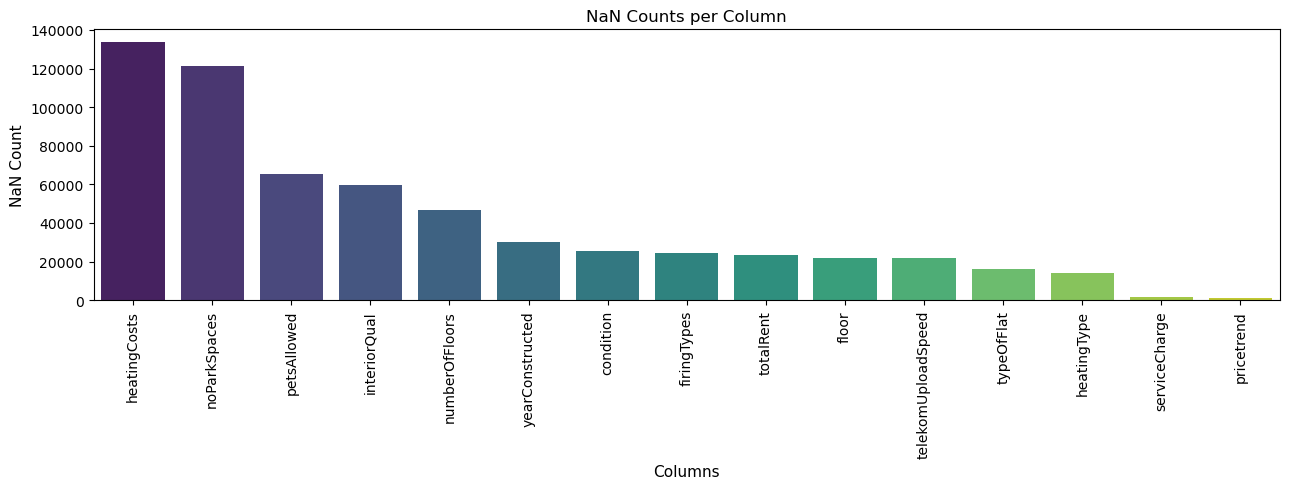

In [72]:
nan_counts = germany_re.isna().sum()
nan_counts_nonzero = nan_counts[nan_counts > 0]
nan_counts_df = pd.DataFrame(nan_counts_nonzero, columns=['NaN Count'])
nan_counts_df_sorted = nan_counts_df.sort_values(by='NaN Count', ascending=False)

plt.figure(figsize=(13, 5))
sns.barplot(x=nan_counts_df_sorted.index, y=nan_counts_df_sorted['NaN Count'], palette='viridis')

plt.title("NaN Counts per Column", fontsize=12)
plt.xlabel("Columns", fontsize=11)
plt.ylabel("NaN Count", fontsize=11)
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.4 Seeking and Removing Outliers


</div>

This code identifies and removes outliers from a dataset of real estate data based on Z-scores, ensuring the remaining data is more representative for analysis. It calculates Z-scores for the `livingSpace` and `baseRent` columns to measure how far each data point deviates from the mean in terms of standard deviations. Rows where the sum of these Z-scores exceeds a predefined threshold (set at 5) are flagged as outliers and removed from the original dataset. The identified outliers are stored in a separate DataFrame, sorted by `baseRent` in descending order, and visualized using a scatter plot to highlight their distribution.

Additionally, the outlier rows are dropped from the main dataset, ensuring a cleaner dataset for further analysis. The scatter plot visually depicts the outliers, aiding in understanding their relationship between `baseRent` and `livingSpace`. This process improves data quality by removing extreme values that could distort analysis or modeling results.


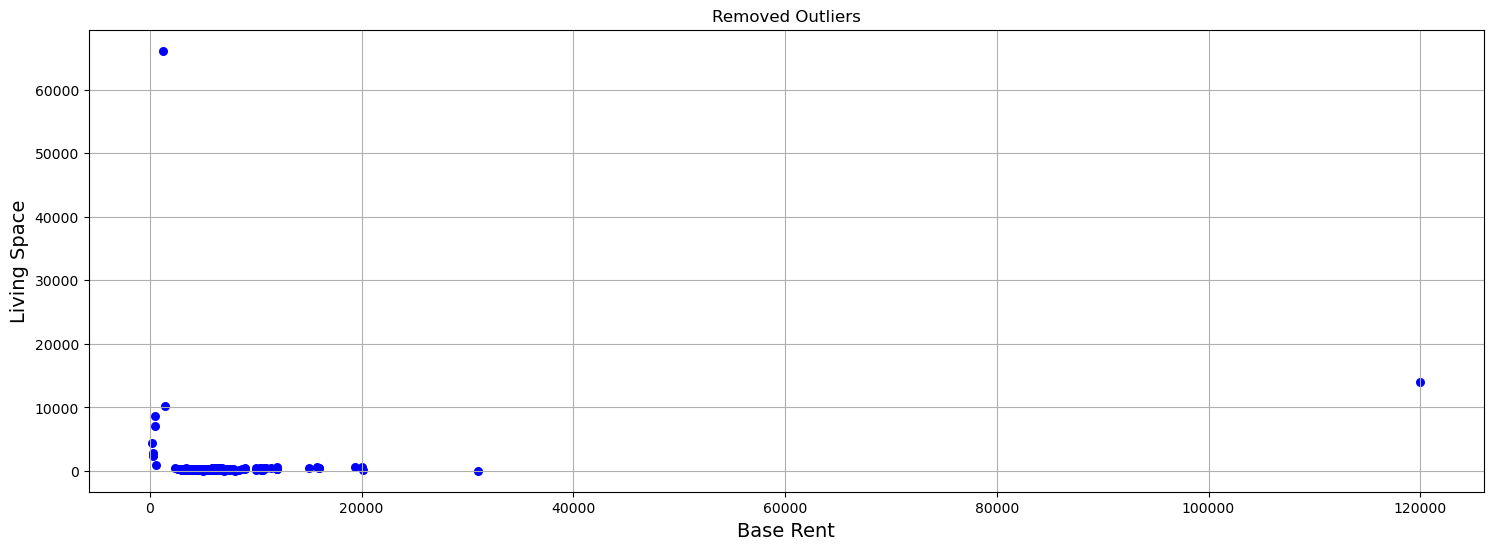

In [73]:
z_threshold = 5  

germany_re_copy = germany_re.copy() # Make a copy of the DataFrame to avoid modifying the original
germany_re_copy['z_livingSpace'] = (germany_re_copy['livingSpace'] - germany_re_copy['livingSpace'].mean()) / germany_re_copy['livingSpace'].std()
germany_re_copy['z_baseRent'] = (germany_re_copy['baseRent'] - germany_re_copy['baseRent'].mean()) / germany_re_copy['baseRent'].std()
germany_re_copy['sum_z'] = germany_re_copy['z_livingSpace'] + germany_re_copy['z_baseRent']

outliers_df = germany_re_copy[abs(germany_re_copy['sum_z']) > z_threshold].copy()
outliers_df.drop(columns=['z_livingSpace', 'z_baseRent', 'sum_z'], inplace=True)
outliers_df.sort_values(by='baseRent', ascending=False, inplace=True)

def highlight_yellow(s):
    return 'background-color: #7a2048'

numeric_columns = outliers_df.select_dtypes(include='number').columns
germany_re = germany_re.drop(outliers_df.index)

plt.figure(figsize=(18, 6)) 
plt.scatter(outliers_df['baseRent'], outliers_df['livingSpace'], color='blue', s=30) 
plt.title('Removed Outliers', fontsize=12) 
plt.xlabel('Base Rent', fontsize=14) 
plt.ylabel('Living Space', fontsize=14) 
plt.grid()  
plt.show()  

 <div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.5 Apply Label Encoding to Dataset



</div>

This step converts categorical data into numeric format to make it suitable for machine learning algorithms. Each categorical column in the dataset is encoded using label encoding, where unique values in the column are assigned numeric labels. The label encoders are stored for each column to allow future reverse transformations if needed. This transformation ensures that categorical data is effectively represented while preserving the original structure for further analysis or modeling.


In [ ]:
label_encoders = {}

categorical_cols = germany_re.select_dtypes(include=[object]).columns

for col in categorical_cols:
    le = LabelEncoder()
    germany_re[col] = le.fit_transform(germany_re[col])
    label_encoders[col] = le  

germany_re

,serviceCharge,heatingType,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,...,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count
0,245.0,0,False,6,4.62,10.0,840.0,1965.0,1.0,78,...,1,4.0,1.0,3.0,4,True,4,NaN,21,42
1,134.0,9,True,8,3.47,10.0,NaN,1871.0,2.0,34,...,1,3.0,NaN,NaN,3,False,4,NaN,217,0
2,255.0,4,True,8,2.72,2.4,1300.0,2019.0,1.0,119,...,0,3.0,3.0,4.0,3,False,4,NaN,91,63
8,110.0,8,False,5,3.77,40.0,690.0,1970.0,1.0,78,...,8,2.0,2.0,2.0,2,False,2,NaN,50,4
9,95.0,9,False,7,1.92,40.0,NaN,1953.0,NaN,34,...,0,2.5,2.0,5.0,2,False,2,NaN,123,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,80.0,5,False,12,2.58,2.4,670.0,NaN,NaN,34,...,8,3.0,3.0,3.0,3,False,4,NaN,54,0
268845,90.0,6,True,0,2.74,10.0,910.0,2016.0,1.0,54,...,8,3.0,NaN,NaN,3,False,4,NaN,27,5
268846,220.0,5,True,12,6.49,NaN,1150.0,1983.0,1.0,34,...,0,3.5,1.0,1.0,3,False,5,NaN,14,6
268847,220.0,0,True,21,2.90,40.0,930.0,1965.0,1.0,34,...,0,4.0,1.0,2.0,4,True,4,NaN,32,45


 <div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.6 Appy Min Max Scaler to Dataset


</div>

This step prepares the dataset by normalizing numerical columns and converting boolean data into numeric format. First, the numerical columns are scaled to a range between 0 and 1 using Min-Max Scaling, which helps standardize the values for better compatibility with machine learning algorithms. Boolean columns are then converted into integers, where `True` is represented as `1` and `False` as `0`. Finally, the scaled numerical data and converted boolean data are combined into a single dataset, ensuring all features are in a numeric format suitable for analysis or modeling.


In [ ]:
df_numeric = germany_re.select_dtypes(include=[np.number]) 
df_boolean = germany_re.select_dtypes(include=[bool])  

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=germany_re.index)

df_boolean_numeric = df_boolean.astype(int)

german_re_scaled = pd.concat([df_scaled, df_boolean_numeric], axis=1)
german_re_scaled

,serviceCharge,heatingType,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,baseRent,...,noRoomsRange,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count,balcony,hasKitchen,cellar,lift,garden
0,0.001677,0.000000,0.053571,0.622018,0.090909,0.000053,0.885321,0.000446,0.655462,0.175516,...,0.75,0.500000,NaN,0.035000,0.073684,0,0,1,0,1
1,0.000917,0.692308,0.071429,0.579817,0.090909,NaN,0.799083,0.000892,0.285714,0.235988,...,0.50,0.500000,NaN,0.361667,0.000000,1,0,0,0,0
2,0.001745,0.307692,0.071429,0.552294,0.014141,0.000083,0.934862,0.000446,1.000000,0.284661,...,0.50,0.500000,NaN,0.151667,0.110526,1,0,1,1,0
8,0.000753,0.615385,0.044643,0.590826,0.393939,0.000044,0.889908,0.000446,0.655462,0.171091,...,0.25,0.166667,NaN,0.083333,0.007018,0,1,1,0,0
9,0.000650,0.692308,0.062500,0.522936,0.393939,NaN,0.874312,NaN,0.285714,0.088496,...,0.25,0.166667,NaN,0.205000,0.214035,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,0.000548,0.384615,0.107143,0.547156,0.014141,0.000043,NaN,NaN,0.285714,0.174041,...,0.50,0.500000,NaN,0.090000,0.000000,0,0,0,0,0
268845,0.000616,0.461538,0.000000,0.553028,0.090909,0.000058,0.932110,0.000446,0.453782,0.241888,...,0.50,0.500000,NaN,0.045000,0.008772,1,0,1,0,0
268846,0.001506,0.384615,0.107143,0.690642,NaN,0.000073,0.901835,0.000446,0.285714,0.274336,...,0.50,0.666667,NaN,0.023333,0.010526,1,1,0,0,0
268847,0.001506,0.000000,0.187500,0.558899,0.393939,0.000059,0.885321,0.000446,0.285714,0.191740,...,0.75,0.500000,NaN,0.053333,0.078947,1,0,1,0,1


<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.7 Apply Random Search to Find Best Value for K




</div>

This code uses a K-Nearest Neighbors (KNN) imputer to handle missing values in the dataset by predicting them based on the values of neighboring samples. A pipeline is defined to streamline the process, and the optimal number of neighbors (`k`) for the imputer is determined using a randomized search. The search explores various `k` values, evaluating each configuration using cross-validation and the negative mean squared error as the scoring metric. After fitting the pipeline, the best number of neighbors and its corresponding score are identified. This ensures that the imputation process is optimized for the given dataset, leading to more accurate and consistent handling of missing values.


In [78]:
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

knn_imputer = KNNImputer()

pipeline = Pipeline([
    ('imputer', knn_imputer)
])

param_dist = {
    'imputer__n_neighbors': randint(1, 21)  
}

scoring_metric = 'neg_mean_squared_error'

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,  
    scoring=scoring_metric,
    cv=5,  
    random_state=42,
    n_jobs=-1  
)

random_search.fit(german_re_scaled)

best_k = random_search.best_params_['imputer__n_neighbors']
best_score = -random_search.best_score_  

print(f"Best number of neighbors (k): {best_k}")

Best number of neighbors (k): 7


<div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.8 Apply KNN Imputer for Removing NaN




</div>

This code applies a K-Nearest Neighbors (KNN) imputer with a predefined number of neighbors (`k=7`) to handle missing values in the dataset. The imputer estimates missing values by considering the mean of the nearest 7 samples for each feature. The transformed dataset, with imputed values replacing the missing ones, is then converted back into a DataFrame with the original column names. This process ensures that the dataset is complete and ready for further analysis or modeling without any missing data.


In [79]:
imputer = KNNImputer(n_neighbors=7)
imputed_data = imputer.fit_transform(german_re_scaled)
imputed_df = pd.DataFrame(imputed_data, columns=german_re_scaled.columns)
imputed_df

,serviceCharge,heatingType,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,baseRent,...,noRoomsRange,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count,balcony,hasKitchen,cellar,lift,garden
0,0.001677,0.000000,0.053571,0.622018,0.090909,0.000053,0.885321,0.000446,0.655462,0.175516,...,0.75,0.500000,0.006547,0.035000,0.073684,0.0,0.0,1.0,0.0,1.0
1,0.000917,0.692308,0.071429,0.579817,0.090909,0.000052,0.799083,0.000892,0.285714,0.235988,...,0.50,0.500000,0.006399,0.361667,0.000000,1.0,0.0,0.0,0.0,0.0
2,0.001745,0.307692,0.071429,0.552294,0.014141,0.000083,0.934862,0.000446,1.000000,0.284661,...,0.50,0.500000,0.007438,0.151667,0.110526,1.0,0.0,1.0,1.0,0.0
3,0.000753,0.615385,0.044643,0.590826,0.393939,0.000044,0.889908,0.000446,0.655462,0.171091,...,0.25,0.166667,0.004304,0.083333,0.007018,0.0,1.0,1.0,0.0,0.0
4,0.000650,0.692308,0.062500,0.522936,0.393939,0.000025,0.874312,0.000127,0.285714,0.088496,...,0.25,0.166667,0.003738,0.205000,0.214035,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202175,0.000548,0.384615,0.107143,0.547156,0.014141,0.000043,0.872084,0.000510,0.285714,0.174041,...,0.50,0.500000,0.007135,0.090000,0.000000,0.0,0.0,0.0,0.0,0.0
202176,0.000616,0.461538,0.000000,0.553028,0.090909,0.000058,0.932110,0.000446,0.453782,0.241888,...,0.50,0.500000,0.005975,0.045000,0.008772,1.0,0.0,1.0,0.0,0.0
202177,0.001506,0.384615,0.107143,0.690642,0.187879,0.000073,0.901835,0.000446,0.285714,0.274336,...,0.50,0.666667,0.007826,0.023333,0.010526,1.0,1.0,0.0,0.0,0.0
202178,0.001506,0.000000,0.187500,0.558899,0.393939,0.000059,0.885321,0.000446,0.285714,0.191740,...,0.75,0.500000,0.008019,0.053333,0.078947,1.0,0.0,1.0,0.0,1.0


Load Imputed Data Automatically


In [60]:
#imputed_df = pd.read_csv("data202.csv")

Final Version - 202180 rows × 30 columns



In [80]:
imputed_df

,serviceCharge,heatingType,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,baseRent,...,noRoomsRange,livingSpaceRange,heatingCosts,description_word_count,facilities_word_count,balcony,hasKitchen,cellar,lift,garden
0,0.001677,0.000000,0.053571,0.622018,0.090909,0.000053,0.885321,0.000446,0.655462,0.175516,...,0.75,0.500000,0.006547,0.035000,0.073684,0.0,0.0,1.0,0.0,1.0
1,0.000917,0.692308,0.071429,0.579817,0.090909,0.000052,0.799083,0.000892,0.285714,0.235988,...,0.50,0.500000,0.006399,0.361667,0.000000,1.0,0.0,0.0,0.0,0.0
2,0.001745,0.307692,0.071429,0.552294,0.014141,0.000083,0.934862,0.000446,1.000000,0.284661,...,0.50,0.500000,0.007438,0.151667,0.110526,1.0,0.0,1.0,1.0,0.0
3,0.000753,0.615385,0.044643,0.590826,0.393939,0.000044,0.889908,0.000446,0.655462,0.171091,...,0.25,0.166667,0.004304,0.083333,0.007018,0.0,1.0,1.0,0.0,0.0
4,0.000650,0.692308,0.062500,0.522936,0.393939,0.000025,0.874312,0.000127,0.285714,0.088496,...,0.25,0.166667,0.003738,0.205000,0.214035,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202175,0.000548,0.384615,0.107143,0.547156,0.014141,0.000043,0.872084,0.000510,0.285714,0.174041,...,0.50,0.500000,0.007135,0.090000,0.000000,0.0,0.0,0.0,0.0,0.0
202176,0.000616,0.461538,0.000000,0.553028,0.090909,0.000058,0.932110,0.000446,0.453782,0.241888,...,0.50,0.500000,0.005975,0.045000,0.008772,1.0,0.0,1.0,0.0,0.0
202177,0.001506,0.384615,0.107143,0.690642,0.187879,0.000073,0.901835,0.000446,0.285714,0.274336,...,0.50,0.666667,0.007826,0.023333,0.010526,1.0,1.0,0.0,0.0,0.0
202178,0.001506,0.000000,0.187500,0.558899,0.393939,0.000059,0.885321,0.000446,0.285714,0.191740,...,0.75,0.500000,0.008019,0.053333,0.078947,1.0,0.0,1.0,0.0,1.0


Imbalance in Binary Columns

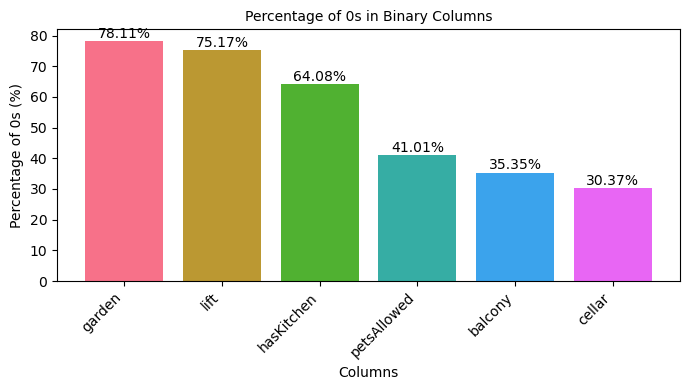

In [81]:
binary_columns = ['petsAllowed', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden']

percent_zeros = {col: (imputed_df[col] == 0).mean() * 100 for col in binary_columns}

percent_zeros_df = pd.DataFrame(percent_zeros.items(), columns=['Column', 'Percentage of 0s'])
percent_zeros_df = percent_zeros_df.sort_values(by='Percentage of 0s', ascending=False)
percent_zeros_df['Percentage of 0s'] = percent_zeros_df['Percentage of 0s'].map('{:.2f}%'.format)

colors = sns.color_palette("husl", len(percent_zeros_df))  # Use a Seaborn color palette

plt.figure(figsize=(7, 4))
bars = plt.bar(
    percent_zeros_df['Column'], 
    percent_zeros_df['Percentage of 0s'].str.rstrip('%').astype(float), 
    color=colors
)

plt.title('Percentage of 0s in Binary Columns', fontsize=10)
plt.xlabel('Columns', fontsize=10)
plt.ylabel('Percentage of 0s (%)', fontsize=10)
plt.xticks(rotation=45, ha='right')

for index, value in enumerate(percent_zeros_df['Percentage of 0s']):
    plt.text(index, float(value.rstrip('%')) + 1, value, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


 <div style="background-color: #f3ca20; color: #000000; font-size: 18px; padding: 5px;"> 1.9 Correlation Matrix for Analysys of Final Result



</div>

This code calculates the correlation matrix of the imputed dataset to explore the relationships between different numerical features. The correlation matrix is visualized using a heatmap, where each cell represents the strength of the correlation between two features. The heatmap is annotated with correlation values, and the color intensity reflects the degree of correlation, with a color palette ranging from cool to warm tones. This visualization helps identify highly correlated features, which can be useful for feature selection or understanding the underlying patterns in the data.


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

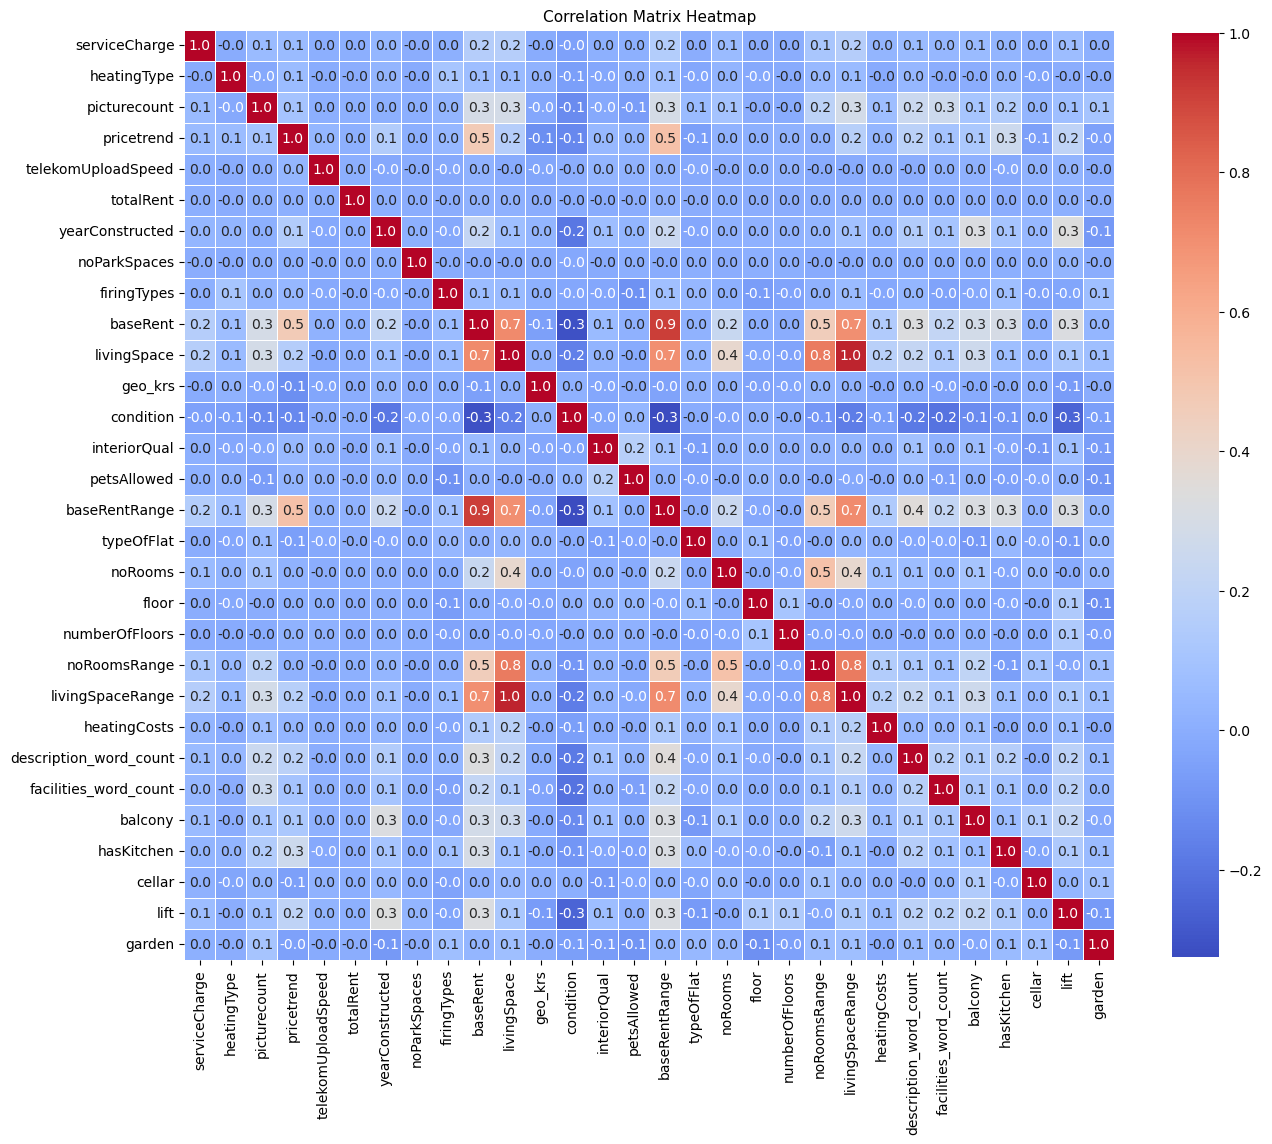

In [82]:
corr_matrix = imputed_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Matrix Heatmap', fontsize=11)

# <div style="background-color: #ff6e40; color: white; font-size: 24px; padding: 10px;">Stage 2 - Apply Machine Learning Models to Preprocessed Data </div>


# <div style="background-color: #ff6e40; color: white; font-size: 24px; padding: 10px;">2.1 Classification Task - Predicting if a Flat has a Balcony</div>


 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.1 Prepare Features, Scaling Features, Apply PCA </div>

![Training and Test Accuracy](train_test_accuracy.png)


![Training and Test Accuracy](train_test_accuracy129k.png)


This code applies Principal Component Analysis (PCA) to reduce the dimensionality of the dataset while preserving as much variance as possible. First, a subset of relevant features is selected for PCA. Then, PCA is performed with 8 components, transforming the selected features into a lower-dimensional space. The transformed data is stored in a new DataFrame with column names representing the principal components (PC1, PC2, etc.). The dataset is then split into training and test sets, with 80% of the data used for training and 20% for testing. This preprocessing step prepares the data for model training, reducing complexity while maintaining important information.


In [83]:
features = ['livingSpace', 'baseRent', 'totalRent', 'floor', 'yearConstructed', 'noParkSpaces', 'typeOfFlat', 'condition', 'cellar', 'garden', 'livingSpaceRange']

features = imputed_df[features]

pca = PCA(n_components=9)  
X_pca = pca.fit_transform(features)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=imputed_df.index)

X = X_pca_df
y = imputed_df['lift']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.2 Logistic Regression for Lift Problem </div>

This code implements a classification pipeline using Logistic Regression to train, evaluate, and log results with MLflow. It calculates training accuracy, test accuracy, and generates metrics like precision, recall, F1-score, and a confusion matrix for detailed performance analysis. The metrics and the trained model are logged to an MLflow tracking server, enabling experiment tracking and reproducibility. Key outputs such as accuracy scores and evaluation reports are printed for immediate review. The use of MLflow ensures scalable and collaborative tracking of model performance over time.

<b>Accuracy</b>
- The model exhibits consistent performance between training and testing datasets, indicating low risk of overfitting.
- The model has high true negatives (28890) but struggles with false negatives (5664), affecting its ability to detect the minority class (Class 1).

<b>Insights</b>
1. **Precision**:
   - The precision for Class 0 (0.84) is higher than Class 1 (0.74). This indicates the model is better at correctly predicting negatives than positives.
2. **Recall**:
   - The recall for Class 0 (0.95) is very high, showing most actual negatives are correctly identified.
   - The recall for Class 1 (0.44) is relatively low, meaning the model misses a significant number of positives (false negatives).
3. **F1-Score**:
   - Class 0 has a strong F1-score (0.89), while Class 1 has a lower F1-score (0.55), reflecting its difficulty balancing precision and recall for the minority class.



In [84]:
model = LogisticRegression()
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)  

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_dict = classification_report(y_test, y_pred, output_dict=True) 

mlflow.set_tracking_uri("http://localhost:5000") 
mlflow.set_experiment("Classification Problem - Lift in German Real Estate")

with mlflow.start_run(run_name="Logistic Regression for Lift Problem- model 202k"):
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", accuracy)

    for label, metrics in class_report_dict.items():
        if label in ["macro avg", "weighted avg"]:
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"{label}_support", metrics["support"])
        elif label.isdigit():  
            mlflow.log_metric(f"class_{label}_precision", metrics["precision"])
            mlflow.log_metric(f"class_{label}_recall", metrics["recall"])
            mlflow.log_metric(f"class_{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"class_{label}_support", metrics["support"])

#     mlflow.sklearn.log_model(model, "model")

print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

2024/12/01 19:40:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression for Lift Problem- model 202k at: http://localhost:5000/#/experiments/969615733438149177/runs/2bbecefdfcdf4995bc16c68869beef90.
2024/12/01 19:40:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/969615733438149177.


Train Accuracy: 0.822
Test Accuracy: 0.823
Confusion Matrix:
[[28890  1512]
 [ 5664  4370]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     30402
         1.0       0.74      0.44      0.55     10034

    accuracy                           0.82     40436
   macro avg       0.79      0.69      0.72     40436
weighted avg       0.81      0.82      0.81     40436



 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.3 Random Forest for Lift Problem</div>

The code initializes and trains a **Random Forest model** with 200 estimators and a fixed `random_state` of 42 using the `X_train` and `y_train` datasets. After training, the model's performance is evaluated on the test set, calculating **train accuracy**, **test accuracy**, a **confusion matrix**, and a **classification report** which includes precision, recall, and F1-score for each class. These hyperparameters and evaluation metrics are logged to **MLflow**, including training accuracy, test accuracy, and class-wise metrics. The trained model is also saved in **MLflow** for future tracking and deployment. Lastly, the code prints the training and test accuracies, confusion matrix, and classification report for evaluation.

<b> Accuracy </b>
- **Train Accuracy**: 0.802  
- **Test Accuracy**: 0.802  
  - The model demonstrates consistent training and testing accuracy, suggesting no overfitting.
  - The overall accuracy of 80.2% may not reflect the true performance due to imbalanced data.

<b> Insights </b>
1. **Precision**:
   - Class 0 (0.80) and Class 1 (0.82) have comparable precision, indicating the model is relatively balanced in avoiding false positives for both classes.
2. **Recall**:
   - Class 0 recall is very high (0.98), showing the model correctly identifies most actual negatives.
   - Class 1 recall is significantly low (0.26), meaning the model misses many positive cases (high false negative rate).
3. **F1-Score**:
   - Class 0 achieves a high F1-score (0.88) due to strong precision and recall.
   - Class 1 has a low F1-score (0.39), reflecting the imbalance between precision and recall for positive cases.


In [85]:
#Hyperparameters
n_estimators = 200
max_depth = 3
random_state = 42
min_samples_split = 2 
min_samples_leaf = 2   

model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

train_accuracy = model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

mlflow.set_tracking_uri("http://localhost:5000")

with mlflow.start_run(run_name="Random Forest for Lift Problem- model 202k"):
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("min_samples_split", min_samples_split)
    mlflow.log_param("min_samples_leaf", min_samples_leaf)
    mlflow.log_param("random_state", random_state)
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    for label, metrics in class_report.items():
        if isinstance(metrics, dict): 
            mlflow.log_metric(f"{label}_precision", metrics.get("precision", 0))
            mlflow.log_metric(f"{label}_recall", metrics.get("recall", 0))
            mlflow.log_metric(f"{label}_f1-score", metrics.get("f1-score", 0))
            mlflow.log_metric(f"{label}_support", metrics.get("support", 0))
        elif isinstance(metrics, float):  
            mlflow.log_metric(f"{label}_score", metrics)
    
    mlflow.sklearn.log_model(model, "random_forest_model")

print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {test_accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

2024/12/01 19:42:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 19:42:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest for Lift Problem- model 202k at: http://localhost:5000/#/experiments/969615733438149177/runs/bdc0b8d996d24cc78ed6b7523e327bf2.
2024/12/01 19:42:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/969615733438149177.


Train accuracy: 0.802
Test accuracy: 0.802
Confusion Matrix:
[[29828   574]
 [ 7436  2598]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88     30402
         1.0       0.82      0.26      0.39     10034

    accuracy                           0.80     40436
   macro avg       0.81      0.62      0.64     40436
weighted avg       0.81      0.80      0.76     40436



 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.4 Gradient Boosting for Lift Problem </div>

The code initializes and trains a **Gradient Boosting model** with specified hyperparameters: 200 estimators, a learning rate of 0.1, and a maximum depth of 3, using the `X_train` and `y_train` datasets. After training, the model's performance is evaluated on the test set using **test accuracy**, a **confusion matrix**, and a **classification report** that includes metrics such as precision, recall, and F1-score for each class. These hyperparameters and performance metrics are then logged to **MLflow**, including training accuracy and the class-wise metrics. The trained model is also saved in **MLflow**, allowing for future tracking and deployment. Finally, the code prints the training and test accuracies, confusion matrix, and classification report for further evaluation.<br>

<b> Accuracy </b>
- **Training Accuracy**: 0.854  
- **Test Accuracy**: 0.851  
  - The model exhibits strong and consistent performance on both training and testing datasets, indicating minimal overfitting.

<b> Insights </b>
1. **Precision**:
   - The model has high precision for Class 0 (0.87), indicating most predicted negatives are accurate.
   - Class 1 precision is lower (0.78), but still acceptable for many use cases.
2. **Recall**:
   - Class 0 recall is very high (0.95), showing the model identifies most actual negatives correctly.
   - Class 1 recall is moderate (0.56), meaning a significant number of positives are misclassified as negatives (false negatives).
3. **F1-Score**:
   - Class 0 achieves a very strong F1-score (0.91), reflecting a balance between precision and recall.

In [86]:
#Hyperparameters
n_estimators = 200
learning_rate = 0.1
max_depth = 3
min_samples_split = 2  
min_samples_leaf = 2   

model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)

y_pred = model.predict(X_test)
    
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_dict = classification_report(y_test, y_pred, output_dict=True) 


with mlflow.start_run(run_name="Gradient Boosting for Lift Problem- model 202k"):
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_metric("min_samples_split", min_samples_split)
    mlflow.log_metric("min_samples_leaf", min_samples_leaf)
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    
    for label, metrics in class_report_dict.items():
        if label in ["macro avg", "weighted avg"]:
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"{label}_support", metrics["support"])
        elif label.isdigit():  
            mlflow.log_metric(f"class_{label}_precision", metrics["precision"])
            mlflow.log_metric(f"class_{label}_recall", metrics["recall"])
            mlflow.log_metric(f"class_{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"class_{label}_support", metrics["support"])
    
    mlflow.sklearn.log_model(model, "gradient_boosting_model")
    
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

2024/12/01 19:46:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 19:46:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Gradient Boosting for Lift Problem- model 202k at: http://localhost:5000/#/experiments/969615733438149177/runs/23f94c39a9eb4f82a3c1f83fb729f140.
2024/12/01 19:46:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/969615733438149177.


Training Accuracy: 0.854
Test Accuracy: 0.851
Confusion Matrix:
[[28851  1551]
 [ 4463  5571]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     30402
         1.0       0.78      0.56      0.65     10034

    accuracy                           0.85     40436
   macro avg       0.82      0.75      0.78     40436
weighted avg       0.85      0.85      0.84     40436



 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.5 Support Vector Machine for Lift Problem</div>

This code implements a Support Vector Machine (SVM) model using a polynomial kernel and logs its performance using MLflow. The SVM is trained with specified hyperparameters (`kernel='poly'`, `C=1.0`, `gamma='scale'`, `epsilon=0.1`) on the training data, and the accuracy on both the training and test sets is evaluated. The confusion matrix and classification report are generated to assess the model's performance in detail. Using MLflow, the model's hyperparameters, performance metrics (e.g., accuracy, precision, recall, F1-score), and the trained model are logged for experiment tracking and reproducibility. The code ensures that model parameters, metrics, and the final model are stored for future reference and comparison.

<b> Accuracy </b>
- **Train Accuracy**: 0.808  
- **Test Accuracy**: 0.808  
  - The model demonstrates consistent performance across both the training and test datasets, with no signs of overfitting.


<b> Insights </b>
1. **Precision**:
   - The model has relatively good precision for both Class 0 (0.81) and Class 1 (0.79), indicating a low rate of false positives for both classes.
2. **Recall**:
   - Class 0 recall is very high (0.97), showing that most actual negatives are correctly identified.
   - Class 1 recall is low (0.31), meaning the model misses a large number of positive cases (false negatives).
3. **F1-Score**:
   - Class 0 has a strong F1-score (0.88), reflecting a good balance between precision and recall.
   - Class 1 has a much lower F1-score (0.45), indicating difficulty in balancing precision and recall for the minority class.


In [87]:
#Hyperparameters
kernel = 'poly'  
C = 1.0            
gamma = 'scale'    
epsilon = 0.1     

model = SVC(kernel=kernel, C=C, gamma=gamma)
model.fit(X_train, y_train)

train_accuracy = model.score(X_train, y_train)  
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)

mlflow.set_tracking_uri("http://localhost:5000")  

with mlflow.start_run(run_name="SVM fpr Lift Problem - model 202k"):
    mlflow.log_param("kernel", kernel)
    mlflow.log_param("C", C)
    mlflow.log_param("gamma", gamma)
    mlflow.log_param("epsilon", epsilon)  

    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    
    for label, metrics in class_report_dict.items():
        if label in ["macro avg", "weighted avg"]:
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"{label}_support", metrics["support"])
        elif label.isdigit():  
            mlflow.log_metric(f"class_{label}_precision", metrics["precision"])
            mlflow.log_metric(f"class_{label}_recall", metrics["recall"])
            mlflow.log_metric(f"class_{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"class_{label}_support", metrics["support"])

    mlflow.sklearn.log_model(model, "svm_model")

# Print evaluation results
print(f"Train Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

2024/12/01 20:17:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 20:17:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVM fpr Lift Problem - model 202k at: http://localhost:5000/#/experiments/969615733438149177/runs/b1b80703f1ea4c9096dc019d24da68b2.
2024/12/01 20:17:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/969615733438149177.


Train Accuracy: 0.808
Test Accuracy: 0.808
Confusion Matrix:
[[29556   846]
 [ 6913  3121]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88     30402
         1.0       0.79      0.31      0.45     10034

    accuracy                           0.81     40436
   macro avg       0.80      0.64      0.66     40436
weighted avg       0.80      0.81      0.78     40436



 # <div style="background-color: #ecc19c; color: #000000; font-size: 18px; padding: 5px;">2.1.6 K-Nearest Neighbor for Lift Problem </div>

This code trains a K-Nearest Neighbors (KNN) classifier on the training data (`X_train` and `y_train`) and evaluates its performance on both the training and test sets. It logs important metrics such as training accuracy, test accuracy, and detailed classification report (precision, recall, F1-score, and support) to MLflow for tracking and reproducibility. The number of neighbors (`n_neighbors`) is logged as a hyperparameter, allowing you to track different model configurations. Additionally, the trained KNN model is saved in MLflow for future use or comparison with other models. The confusion matrix and classification report are printed to provide insight into the model's performance.

<b> Accuracy </b>
- **Train Accuracy**: 0.870  
- **Test Accuracy**: 0.825  
  - The model performs well on the training dataset but experiences a slight drop in accuracy on the test dataset, suggesting some overfitting.

<b> Insights</b>
1. **Precision**:
   - Class 0 has high precision (0.86), indicating that most predictions for negatives are correct.
   - Class 1 has a lower precision (0.69), meaning the model has a relatively higher rate of false positives for the positive class.
2. **Recall**:
   - Class 0 recall is high (0.92), indicating the model successfully identifies most actual negatives.
   - Class 1 recall is lower (0.54), showing that the model misses a significant number of positives (false negatives).
3. **F1-Score**:
   - Class 0 has a strong F1-score (0.89), reflecting a good balance of precision and recall for the negative class.
   - Class 1 has a lower F1-score (0.60), indicating difficulty balancing precision and recall for the positive class.


In [88]:
n_neighbors = 5 
        
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)
    
train_accuracy = model.score(X_train, y_train)  
    
y_pred = model.predict(X_test)
    
test_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)  
    
mlflow.set_tracking_uri("http://localhost:5000") 

with mlflow.start_run(run_name="KNN for lienar problem - model 202k"):
    mlflow.log_param("n_neighbors", n_neighbors)
    mlflow.log_metric("train_accuracy", train_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)
    
    for label, metrics in class_report_dict.items():
        if label in ["macro avg", "weighted avg"]:
            mlflow.log_metric(f"{label}_precision", metrics["precision"])
            mlflow.log_metric(f"{label}_recall", metrics["recall"])
            mlflow.log_metric(f"{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"{label}_support", metrics["support"])

        elif label.isdigit():  
            mlflow.log_metric(f"class_{label}_precision", metrics["precision"])
            mlflow.log_metric(f"class_{label}_recall", metrics["recall"])
            mlflow.log_metric(f"class_{label}_f1-score", metrics["f1-score"])
            mlflow.log_metric(f"class_{label}_support", metrics["support"])


    mlflow.sklearn.log_model(model, "knn_model")
    
print(f"Train Accuracy: {train_accuracy:.3f}")   
print(f"Test Accuracy: {test_accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_report(y_test, y_pred))

2024/12/01 20:17:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 20:17:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run KNN for lienar problem - model 202k at: http://localhost:5000/#/experiments/969615733438149177/runs/ace6c97545964073b3a4dfd13becd456.
2024/12/01 20:17:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/969615733438149177.


Train Accuracy: 0.870
Test Accuracy: 0.825
Confusion Matrix:
[[27930  2472]
 [ 4622  5412]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     30402
         1.0       0.69      0.54      0.60     10034

    accuracy                           0.82     40436
   macro avg       0.77      0.73      0.75     40436
weighted avg       0.82      0.82      0.82     40436



# <div style="background-color: #ff6e40; color: white; font-size: 24px; padding: 10px;">2.2 Regression Task - Predicting Base Rent</div>


 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.1 Prepare Features, Scaling Features, Apply PCA </div>

This code snippet performs feature selection and dimensionality reduction to prepare the data for modeling.

The selected features, such as `livingSpace`, `floor`, `yearConstructed`, `lift`, `serviceCharge`, and others, are extracted from the `imputed_df` DataFrame. Principal Component Analysis (PCA) is then applied to these features to reduce their dimensionality while retaining most of the variance in the data. The transformed features are stored in a new DataFrame, `X_pca_df`, with columns named `PC1`, `PC2`, ..., corresponding to the principal components. The target variable `baseRent` is separated into `y`, while the PCA-transformed features are assigned to `X`. Finally, the data is split into training and testing sets using `train_test_split` to prepare the dataset for model training and evaluation.


In [89]:
features = ['livingSpace',  'floor', 'yearConstructed','lift', 'serviceCharge', 'pricetrend', 'picturecount', 'facilities_word_count', 'noRooms', 'garden']

features = imputed_df[features]

pca = PCA(n_components=6)  
X_pca = pca.fit_transform(features)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=imputed_df.index)

if mlflow.active_run():
    mlflow.end_run()
X = X_pca_df
y = imputed_df['baseRent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.2 Linear Regression for Base Rent for Predicting Base Rent </div>

The code applies Linear Regression to fit a model, makes predictions, evaluates the model's performance using MSE and R², and logs everything with MLflow for experiment tracking. The residual plot visually shows the errors between predictions and actual values, helping to diagnose the model's fit.
<b> Mean Squared Error (MSE) </b>
- **MSE on Training Data**: 0.00503  
- **MSE on Test Data**: 0.00513  
  - The MSE values are very close between the training and test datasets, indicating that the model generalizes well without significant overfitting or underfitting. The small difference suggests the model's error is consistent across both sets.

<b> R² (R-squared) </b>
- **R² on Training Data**: 0.685  
- **R² on Test Data**: 0.680  
  - The R² values are also similar for both training and test data, showing that the model explains about 68% of the variance in both datasets. This indicates a decent fit, but there is still room for improvement in capturing the underlying data trends.

<b> Insights </b>
- **Generalization**: The minimal difference between training and test MSE, as well as the similar R² values, suggests the model generalizes well and doesn't suffer from overfitting.
- **Model Fit**: The R² score of around 0.68 indicates that the model performs reasonably well in explaining the variance in the data, though there is still a significant portion of unexplained variance (about 32%).

2024/12/01 20:18:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 20:18:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Linear Regression for Base rent Problem - model 202k at: http://localhost:5000/#/experiments/484386471760476623/runs/b67677abe9184f9dae35c876099da689.
2024/12/01 20:18:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/484386471760476623.


MSE on training data: 0.00503
MSE on test data: 0.00513
R² on training data: 0.685
R² on test data: 0.680


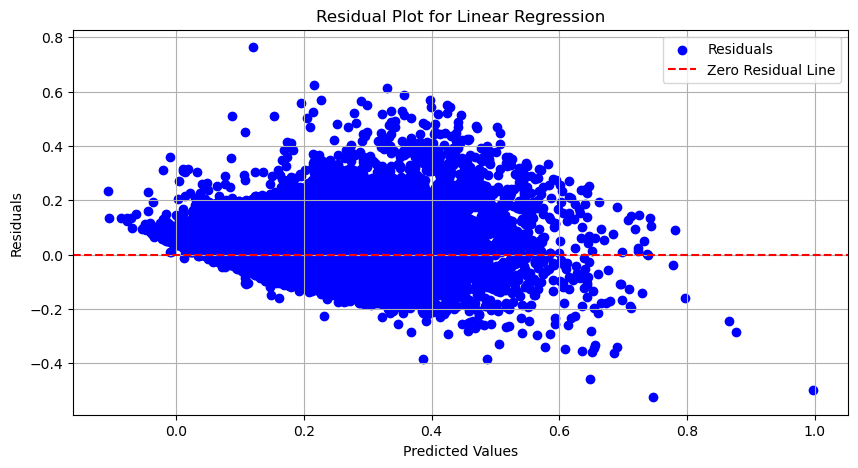

In [90]:
if mlflow.active_run():
    mlflow.end_run()

mlflow.set_tracking_uri("http://localhost:5000")  

mlflow.set_experiment("Regression test3") 

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

residuals = y_test - y_pred_test

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

with mlflow.start_run(run_name="Linear Regression for Base rent Problem - model 202k") as run:
    mlflow.sklearn.log_model(model, "linear_regression_model")

    mlflow.log_metric("mse_train", mse_train)
    mlflow.log_metric("mse_test", mse_test)
    mlflow.log_metric("r2_train", r2_train)
    mlflow.log_metric("r2_test", r2_test)
    
    mlflow.log_param("fit_intercept", model.fit_intercept)
    
    print(f'MSE on training data: {mse_train:.5f}')
    print(f'MSE on test data: {mse_test:.5f}')
    print(f'R² on training data: {r2_train:.3f}')
    print(f'R² on test data: {r2_test:.3f}')
    
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')  
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.3 Random Forest for Predicting Base Rent </div>

This script trains and evaluates a **Random Forest Regressor** for a regression task. It begins by defining hyperparameters such as `n_estimators`, `max_depth`, and `min_samples_leaf`, which control the behavior of the random forest model. After fitting the model on the training data (`X_train`, `y_train`), predictions are generated for both training and test datasets (`y_pred_train`, `y_pred_test`). The script calculates evaluation metrics like **Mean Squared Error (MSE)** and **R²** scores for both datasets, providing insights into the model's performance.

<b> Mean Squared Error (MSE) </b>  
- **MSE on Training Data**: 0.00395  
- **MSE on Test Data**: 0.00468  
  - The MSE values for the training and test datasets are close, indicating the model has not overfit the training data. The slightly higher MSE on the test set is expected and suggests consistent performance across datasets.

<b> R² (R-squared) </b>  
- **R² on Training Data**: 0.752  
- **R² on Test Data**: 0.708  
  - The R² values show that the model explains 75.2% of the variance in the training data and 70.8% in the test data. While there is a small drop in performance on the test set, the model still captures most of the variability.

<b> Insights </b>  
- **Generalization**: The small differences in MSE and R² between the training and test datasets suggest that the model generalizes well to unseen data, avoiding overfitting.  
- **Model Performance**: The model performs strongly, with an R² score over 70% for both datasets, indicating good predictive ability. However, there may still be room to optimize the model to explain more variance in the data.  
- **Residual Analysis**: Reviewing the residual plot might reveal additional insights, such as whether errors are distributed uniformly, which could highlight areas for further improvement.  

2024/12/01 20:24:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run RandomForest for Base Rent - model 202k at: http://localhost:5000/#/experiments/484386471760476623/runs/175cabd597b142628eac595433ebfced.
2024/12/01 20:24:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/484386471760476623.


MSE on training data: 0.00395
MSE on test data: 0.00468
R² on training data: 0.752
R² on test data: 0.708


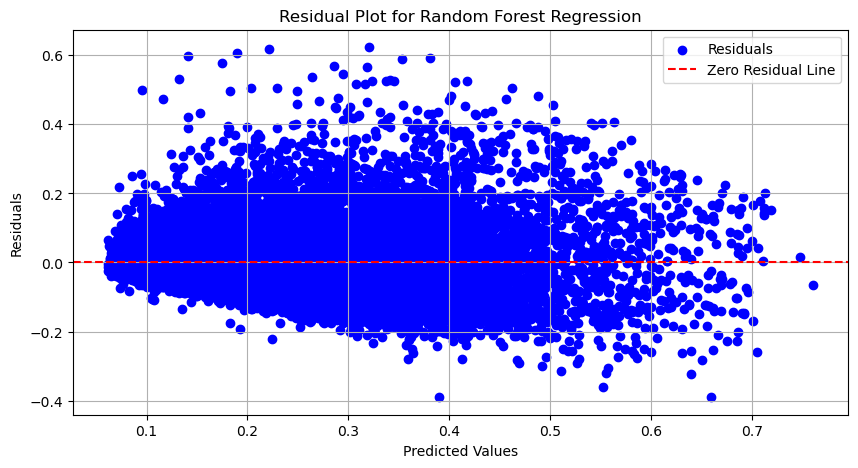

In [91]:
#Hyperparameters
n_estimators=200
max_depth=10
min_samples_split=2
min_samples_leaf=2
random_state=42

model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=random_state)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

residuals = y_test - y_pred_test

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mlflow.set_tracking_uri("http://localhost:5000") 

with mlflow.start_run(run_name="RandomForest for Base Rent - model 202k") as run:
    mlflow.log_metric("mse_train", mse_train)
    mlflow.log_metric("mse_test", mse_test)
    mlflow.log_metric("r2_train", r2_train)
    mlflow.log_metric("r2_test", r2_test)
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_param("max_depth", model.max_depth)
    mlflow.log_param("min_samples_split", model.min_samples_split)
    mlflow.log_param("min_samples_leaf", model.min_samples_leaf)
    mlflow.log_param("max_features", model.max_features)

print(f'MSE on training data: {mse_train:.5f}')
print(f'MSE on test data: {mse_test:.5f}')
print(f'R² on training data: {r2_train:.3f}')
print(f'R² on test data: {r2_test:.3f}')

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')  
plt.title('Residual Plot for Random Forest Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.4 Gradient Boosting with Polynomial Features for Predicting Base Rent </div>

This code implements a Random Forest Regressor model using specified hyperparameters (`n_estimators=200`, `max_depth=10`, `min_samples_split=2`, `min_samples_leaf=2`) and trains it on the training data (`X_train`, `y_train`). After fitting the model, it makes predictions on both the training and test datasets, calculates the residuals (differences between the actual and predicted values), and evaluates the model's performance using Mean Squared Error (MSE) and R² for both datasets. The hyperparameters and evaluation metrics are logged to MLflow for tracking and experiment management. A residual plot is also generated to visually assess the model's prediction errors, with the residuals plotted against the predicted values. Finally, the MSE and R² scores are printed, providing insight into the model's performance and generalization.

<b> Mean Squared Error (MSE) </b>
- **MSE on Training Data**: 0.00428  
- **MSE on Test Data**: 0.00450  
  - The MSE values are very similar for both the training and test datasets, indicating that the model is generalizing well without overfitting. The slight increase in MSE on the test set is expected, suggesting the model performs consistently across both datasets.

<b> R² (R-squared) </b>
- **R² on Training Data**: 0.731  
- **R² on Test Data**: 0.720  
  - The R² values are close, showing that the model explains about 73% of the variance in the training data and 72% in the test data. This indicates a strong fit, though there is still room for improvement in capturing more of the variance.

<b> Insights </b>
- **Generalization**: The small difference in MSE and R² between the training and test datasets suggests that the model generalizes well to unseen data.
- **Model Performance**: An R² score of 0.73 on the training set and 0.72 on the test set indicates that the model is reasonably good at explaining the variance in the data, with only a small portion left unexplained.


2024/12/01 20:35:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 20:35:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Gradient Boosting with Polynomial Features for Predicting Base Rent - Model 202k at: http://localhost:5000/#/experiments/484386471760476623/runs/efb52842d06d4c26b33be26ce2af35f6.
2024/12/01 20:35:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/484386471760476623.


MSE on training data: 0.00428
MSE on test data: 0.00450
R² on training data: 0.731
R² on test data: 0.720


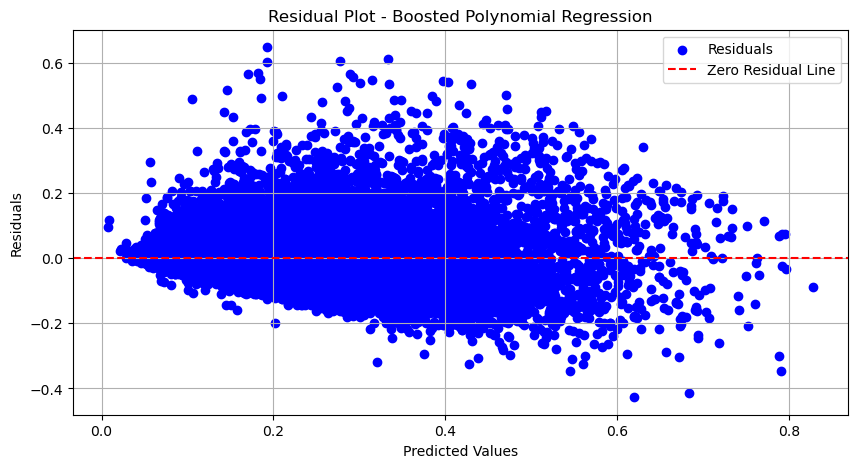

In [92]:
#Hyperparameters
degree = 2
n_estimators=200
learning_rate=0.1
max_depth=3
min_samples_split=5
min_samples_leaf=5
random_state=42

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=random_state)
model.fit(X_train_poly, y_train)

y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

with mlflow.start_run(run_name="Gradient Boosting with Polynomial Features for Predicting Base Rent - Model 202k") as run:
    mlflow.sklearn.log_model(model, "boosted_polynomial_regression_model")
    mlflow.log_param("degree", degree)
    mlflow.log_metric("mse_train", mse_train)
    mlflow.log_metric("mse_test", mse_test)
    mlflow.log_metric("r2_train", r2_train)
    mlflow.log_metric("r2_test", r2_test)
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_param("max_depth", model.max_depth)
    mlflow.log_param("min_samples_split", model.min_samples_split)
    mlflow.log_param("min_samples_leaf", model.min_samples_leaf)
    mlflow.log_param("max_features", model.max_features)

# Print metrics
print(f'MSE on training data: {mse_train:.5f}')
print(f'MSE on test data: {mse_test:.5f}')
print(f'R² on training data: {r2_train:.3f}')
print(f'R² on test data: {r2_test:.3f}')

# Step 5: Plot residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot - Boosted Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.5 XGBoost for Predicting Base Rent </div>

This code implements a polynomial regression model using XGBoost, with key hyperparameters such as `n_estimators=200`, `max_depth=4`, `learning_rate=0.1`, and others to enhance model performance. The training and test data are transformed with polynomial features (degree=2) to capture non-linear relationships. The model is trained on the transformed data (`X_train_poly`), and predictions are made on both the training and test sets. The performance of the model is evaluated using Mean Squared Error (MSE) and R², which are then logged into MLflow along with the model and hyperparameters for experiment tracking. A residual plot is generated to visually assess how well the model's predictions align with the actual values, indicating the presence of any patterns in the errors. The MSE and R² values are printed to provide further insight into the model's performance and generalization.

<b> Mean Squared Error (MSE) </b>
- **MSE on Training Data**: 0.00416  
- **MSE on Test Data**: 0.00445  
  - The MSE on the training data is slightly lower than on the test data, but the difference is minimal. This indicates that the model is performing reasonably well on both the training and test datasets, with no significant signs of overfitting. The MSE values are relatively low, suggesting the model's predictions are close to the actual values.

<b> R² (R-squared) </b>
- **R² on Training Data**: 0.739  
- **R² on Test Data**: 0.722  
  - The R² values on both the training and test datasets are close to each other, indicating the model is generalizing well to unseen data. Although the R² on the training set is slightly higher, the model's ability to explain the variance in the test data is still strong, with about 72% of the variance in the test data explained by the model.

<b> Insights </b>
- **Generalization**: The model's similar performance on both the training and test sets suggests that it is not overfitting. The relatively low MSE and high R² values indicate a good fit for the data without excessive complexity.
- **Model Performance**: The model is performing reasonably well overall, with a solid ability to predict both the training and test data. However, there is still slight room for improvement, particularly in the R² value, which indicates that a portion of the variance in the test data is not fully explained.


2024/12/01 20:36:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 20:36:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost Polynomial Regression - model 202k at: http://localhost:5000/#/experiments/484386471760476623/runs/8a0d7404d41f4c2582efef47627fce8c.
2024/12/01 20:36:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/484386471760476623.


MSE on training data: 0.00416
MSE on test data: 0.00445
R² on training data: 0.739
R² on test data: 0.722


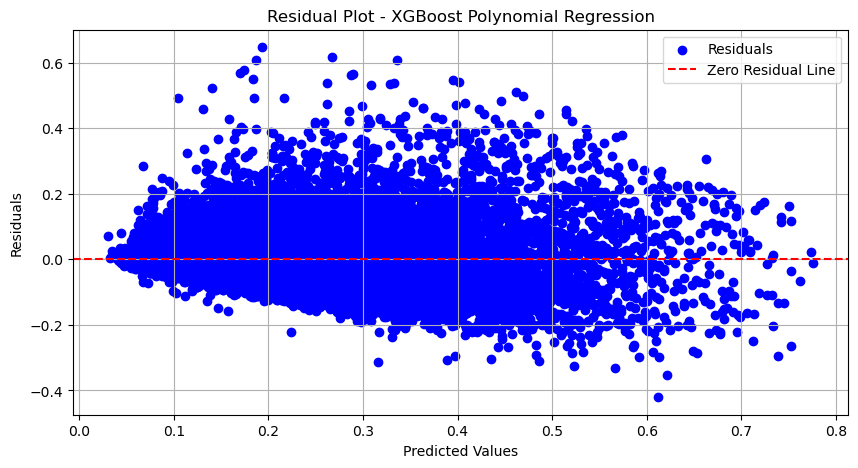

In [93]:
#Hyperparameters
degree = 2 
n_estimators=200   
max_depth=4   
learning_rate=0.1
subsample=0.8     
colsample_bytree=0.8  
random_state=42     

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, subsample=subsample, colsample_bytree=colsample_bytree, random_state=random_state)
model.fit(X_train_poly, y_train)

y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

residuals = y_test - y_pred_test

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

with mlflow.start_run(run_name="XGBoost Polynomial Regression - model 202k") as run:
    mlflow.sklearn.log_model(model, "xgboost_polynomial_regression_model")
    mlflow.log_param("degree", degree)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 3)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("subsample", 0.8)
    mlflow.log_param("colsample_bytree", 0.8)
    mlflow.log_metric("mse_train", mse_train)
    mlflow.log_metric("mse_test", mse_test)
    mlflow.log_metric("r2_train", r2_train)
    mlflow.log_metric("r2_test", r2_test)

print(f'MSE on training data: {mse_train:.5f}')
print(f'MSE on test data: {mse_test:.5f}')
print(f'R² on training data: {r2_train:.3f}')
print(f'R² on test data: {r2_test:.3f}')

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residual Plot - XGBoost Polynomial Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

 # <div style="background-color: #ff6e40; color: #000000; font-size: 18px; padding: 5px;">2.2.6 Support Vector Regression for Predicting Base Rent </div>

This code implements a **Support Vector Regression (SVR)** model using a **linear kernel** to predict target values based on input features. The model is trained on `X_train` and evaluated on both the training and test sets, with **Mean Squared Error (MSE)** and **R² scores** logged for performance metrics. The experiment is tracked using **MLflow**, where hyperparameters (`C`, `gamma`, and `kernel`) and evaluation metrics are logged for future comparison. Additionally, the trained model is saved, and a **residual plot** is generated to visually assess the model's performance by showing the difference between predicted and actual values.

<b> Mean Squared Error (MSE) </b>
- **MSE on Training Data**: 0.00516  
- **MSE on Test Data**: 0.00526  
  - The MSE values for both the training and test data are quite close, indicating the model is performing similarly on both datasets. The slight increase in MSE on the test set suggests the model might be struggling slightly with generalization, but the difference is small enough that overfitting is not a significant concern.

<b> R² (R-squared) </b>
- **R² on Training Data**: 0.676  
- **R² on Test Data**: 0.672  
  - The R² values are nearly identical between the training and test sets, which suggests that the model is generalizing reasonably well. The model is able to explain about 67% of the variance in both the training and test sets, which is moderate performance. While not exceptionally high, it still indicates that the model is capturing a meaningful relationship between the features and the target variable.

<b> Insights </b>
- **Model Performance**: The performance is stable across both training and test data, with only a slight drop in the R² and MSE values on the test data. This indicates that the model is not overfitting but may have room for improvement in its ability to explain the variance in the data.
- **Moderate Accuracy**: The model’s R² values of around 0.67 suggest that it is moderately good at predicting the target variable but may not yet capture all important patterns in the data.

2024/12/01 21:03:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/01 21:03:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run SVR - model 202 at: http://localhost:5000/#/experiments/484386471760476623/runs/c8c5965c68df43aab853d43f0d2336f3.
2024/12/01 21:03:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/484386471760476623.


MSE on training data: 0.00516
MSE on test data: 0.00526
R² on training data: 0.676
R² on test data: 0.672


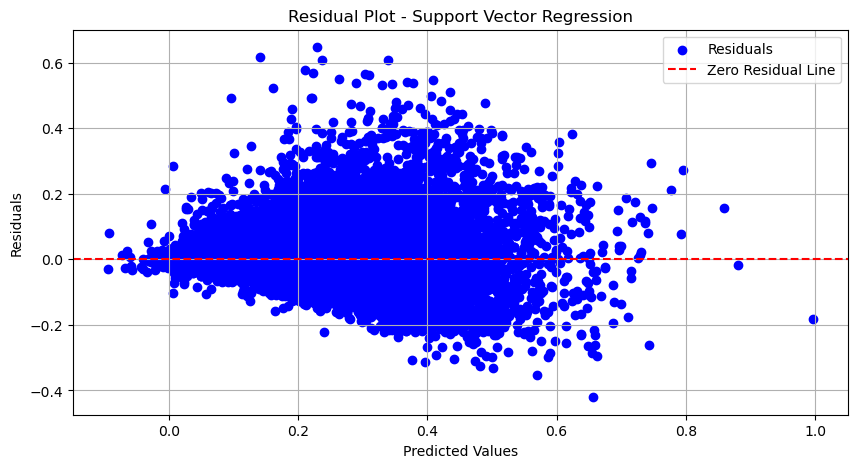

In [94]:
#Hyperparameters
C = 1
gamma = "auto"
kernel = 'linear'

model = SVR(kernel=kernel, C=C, gamma=gamma)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mlflow.set_tracking_uri("http://localhost:5000")  

with mlflow.start_run(run_name="SVR - model 202"):   
    mlflow.log_param("C", C)
    mlflow.log_param("gamma", gamma)
    mlflow.log_param("kernel", kernel)
    mlflow.log_metric("mse_train", mse_train)
    mlflow.log_metric("mse_test", mse_test)
    mlflow.log_metric("r2_train", r2_train)
    mlflow.log_metric("r2_test", r2_test)
    mlflow.sklearn.log_model(model, "svr_model")

 
print(f'MSE on training data: {mse_train:.5f}')
print(f'MSE on test data: {mse_test:.5f}')
print(f'R² on training data: {r2_train:.3f}')
print(f'R² on test data: {r2_test:.3f}')


plt.figure(figsize=(10, 5))
plt.scatter(y_pred_test, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line') 
plt.title('Residual Plot - Support Vector Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

# <div style="background-color: #ddc3a5; color: white; font-size: 24px; padding: 10px;">2.3 Clustering Tasks</div>


 # <div style="background-color: #cbd18f; color: #000000; font-size: 18px; padding: 5px;">2.3.1 Elbow Method for Optimal K</div>

This code uses the **Elbow Method** to determine the optimal number of clusters for a KMeans clustering algorithm. It calculates the **inertia** (sum of squared distances of samples to their closest cluster center) for each value of k (from 1 to 10), and stores it in the `inertia` list. Finally, it plots the inertia values against the number of clusters to visually identify the "elbow" point, which suggests the best k.


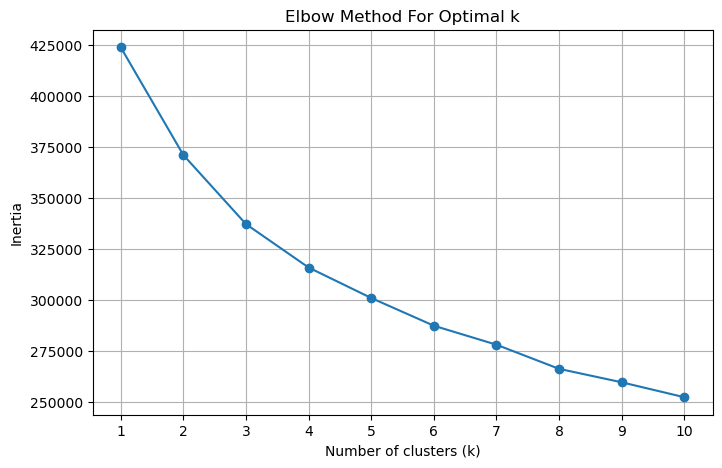

In [95]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(imputed_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()

 # <div style="background-color: #cbd18f; color: #000000; font-size: 18px; padding: 5px;">2.3.2 Customer Segmentation for Rental Properties - Budget, Mid Range and Luxory</div>

This code performs K-means clustering on a dataset containing apartment rental information, specifically focusing on `baseRent` and `livingSpace`. The data is first filtered and imputed, and then K-means is applied with three clusters, each labeled as 'Budget', 'Mid Range', or 'Luxury'.  Finally, the clusters are visualized in a scatter plot, with distinct colors representing each cluster, offering an insightful overview of how apartments group based on rent and living space.

1. `Budget`  
- This cluster is concentrated on the left side of the plot, where **Base Rent (€)** values are lower.  
- Apartments in this group tend to have smaller **Living Space (sqm)**, indicating compact and affordable units suitable for cost-conscious tenants.  

2. `Mid Range`  
- Located in the middle section of the plot, spanning a moderate range of **Base Rent (€)** and **Living Space (sqm)**.  
- These apartments likely offer a balance between cost and space, catering to tenants seeking decent living conditions without overspending.  

3. `Luxury`  
- Found on the right side, where **Base Rent (€)** and **Living Space (sqm)** values are higher.  
- These apartments offer the largest spaces and the highest rents, appealing to tenants with higher budgets who prioritize comfort and spacious living.

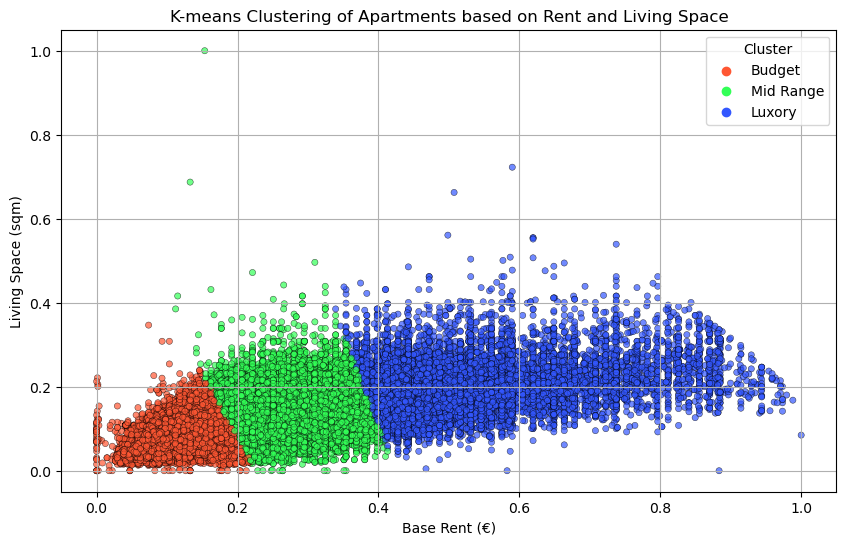

In [120]:
df_filtered = imputed_df[['baseRent', 'livingSpace']].copy()  # Use .copy() to avoid SettingWithCopyWarning

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['baseRent', 'livingSpace'])
centroids['Cluster'] = centroids.index

centroids = centroids.sort_values(by='baseRent')
cluster_names = {row.Cluster: name for row, name in zip(centroids.itertuples(), ['Budget', 'Mid Range', 'Luxory'])}

df_filtered['Cluster Label'] = df_filtered['Cluster'].map(cluster_names)

distinct_colors = ['#FF5733', '#33FF57', '#3357FF']  

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='baseRent', y='livingSpace', 
    hue='Cluster Label', palette=distinct_colors, 
    data=df_filtered, s=20, alpha=0.7, edgecolor='k'
)
plt.title("K-means Clustering of Apartments based on Rent and Living Space")
plt.xlabel("Base Rent (€)")
plt.ylabel("Living Space (sqm)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

<div style="background-color: #cbd18f; color: #000000; font-size: 18px; padding: 5px;">2.3.3 Rental Price Segmentation - Budget, Mid-Range and Luxory
</div>

2 Dimentions

This code performs K-means clustering on a dataset containing apartment rental information, focusing on the `yearConstructed` and `baseRent` attributes. The K-means algorithm is applied to create three clusters, which are labeled as 'Mid Rent, Large Space', 'High Rent, Small Space', and 'High Rent, Large Space'. After clustering, the results are visualized in a scatter plot, with distinct colors representing each cluster, and the plot displays the relationship between the year of construction and the base rent of the apartments.

1. `Budget`  
- Concentrated in the lower-right corner of the plot, where **Year Constructed** and **Base Rent (€)** values are lower.  
- These apartments likely represent older constructions with affordable rents, appealing to families looking for practical, budget-friendly housing options.  

2. `Mid-Range`  
- Positioned in the middle of the plot, with moderate **Year Constructed** and **Base Rent (€)** values.  
- This cluster corresponds to smaller apartments located in central areas, balancing accessibility and cost for urban dwellers.  

3. `Luxory`  
- Found on the upper-right side, where **Year Constructed** and **Base Rent (€)** values are highest.  
- These apartments likely represent modern, high-end properties offering premium amenities, targeting professionals or tenants with higher incomes seeking luxury and convenience.

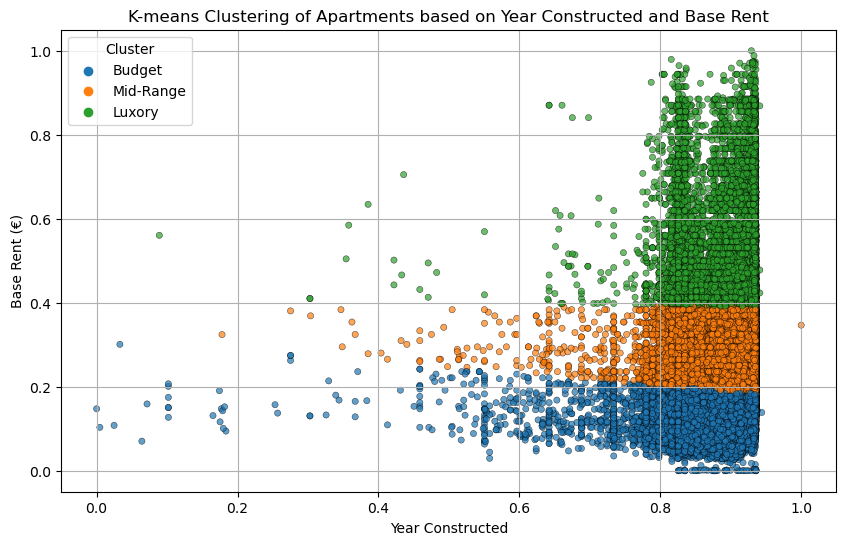

In [113]:
df_filtered = imputed_df[['yearConstructed', 'baseRent']].copy()  # Use .copy() to avoid SettingWithCopyWarning

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
df_filtered.loc[:, 'Cluster'] = kmeans.fit_predict(df_filtered) 

cluster_names = {
    0: 'Budget',
    1: 'Mid-Range',
    2: 'Luxory'
}

df_filtered.loc[:, 'Cluster Label'] = df_filtered['Cluster'].map(cluster_names)


plt.figure(figsize=(10,6))
sns.scatterplot(
    x='yearConstructed', y='baseRent', 
    hue='Cluster Label', 
    data=df_filtered, s=20, alpha=0.7, edgecolor='k'
)
plt.title("K-means Clustering of Apartments based on Year Constructed and Base Rent")
plt.xlabel("Year Constructed")
plt.ylabel("Base Rent (€)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Multidimentional

This code performs K-means clustering on a dataset containing apartment rental information, focusing on attributes like `totalRent`, `baseRent`, `serviceCharge`, `livingSpace`, and `noRooms`. The K-means algorithm creates three clusters, which are then visualized using Principal Component Analysis (PCA) to reduce the data to two dimensions. The results are plotted on a scatter plot, where each point represents a property, and the clusters are color-coded as 'Luxury', 'Mid-Range', and 'Budget'. The plot includes labeled axes for the principal components and a color bar to indicate the cluster label.

1. **`Budget`:**
   - Found on the far left of the plot, with lower **PC1** values.
   - Likely corresponds to **lower-end properties**, possibly older and in poorer condition, or lacking features such as lifts or high-quality finishes.
   - The **compactness** of the cluster suggests more uniformity in this group.

2. **`Mid-Range`:**
   - Occupies the **middle portion** of the graph, where **PC1** values are moderate.
   - Likely represents **properties** that balance affordability and quality, with average condition and features.
   - This group shows some variation in **PC2**, which may reflect differences in secondary attributes like amenities.

3. **`Luxury`:**
   - Found on the far right, with **higher PC1 values**.
   - Likely corresponds to **high-quality properties** with premium features such as better interior quality, newer construction, or advanced amenities (like lifts).
   - The **wider spread** of this cluster suggests greater diversity within this category.


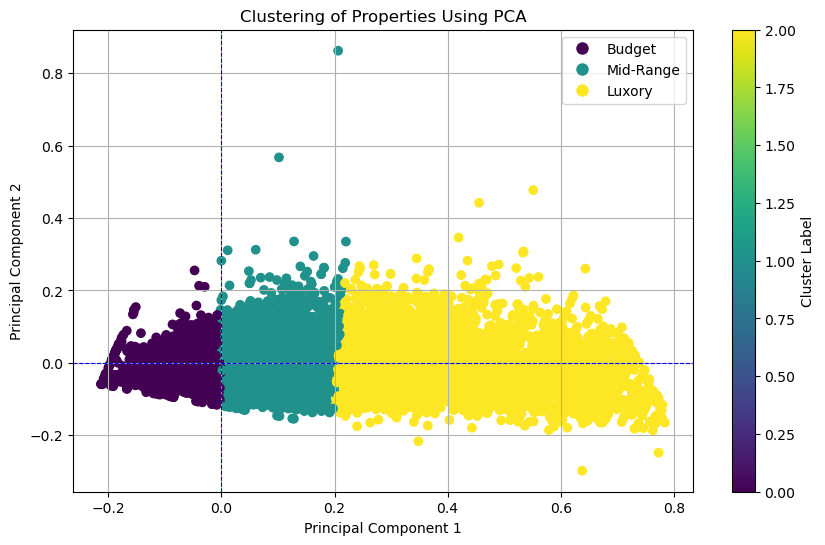

In [116]:
df_filtered = imputed_df[['totalRent', 'baseRent', 'serviceCharge', 'livingSpace', 'noRooms']].copy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_filtered)

df_filtered['Cluster'] = clusters

cluster_means = df_filtered.groupby('Cluster')['baseRent'].mean().sort_values()
cluster_mapping = {old: new for old, new in zip(cluster_means.index, ['Budget', 'Mid-Range', 'Luxory'])}

df_filtered['Cluster Label'] = df_filtered['Cluster'].map(cluster_mapping)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_filtered.drop(['Cluster', 'Cluster Label'], axis=1))

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster Label'] = df_filtered['Cluster Label']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'], 
    c=pca_df['Cluster Label'].map({'Budget': 0, 'Mid-Range': 1, 'Luxory': 2}),
    cmap='viridis', marker='o'
)

plt.axhline(0, color='blue', linewidth=0.8, linestyle='--')  
plt.axvline(0, color='blue', linewidth=0.8, linestyle='--')  

legend_labels = {
    'Budget': 0,
    'Mid-Range': 1,
    'Luxory': 2
}
handles = [
    plt.Line2D([0], [0], marker='o', color='w', 
               markerfacecolor=scatter.cmap(scatter.norm(legend_labels[label])), markersize=10) 
    for label in legend_labels
]
plt.legend(handles, legend_labels.keys(), loc='best')

plt.title('Clustering of Properties Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()



 # <div style="background-color: #cbd18f; color: #000000; font-size: 18px; padding: 5px;">2.3.4 Property Age and Condition Clusters - Newer, Renovated and Older
</div>

This code performs K-means clustering on a dataset containing apartment rental information, focusing on attributes like `totalRent`, `baseRent`, `serviceCharge`, `livingSpace`, and `noRooms`. The K-means algorithm creates three clusters, which are then visualized using Principal Component Analysis (PCA) to reduce the data to two dimensions. The results are plotted on a scatter plot, where each point represents a property, and the clusters are color-coded as 'Luxury', 'Mid-Range', and 'Budget'. The plot includes labeled axes for the principal components and a color bar to indicate the cluster label.

1. **`Newer Properties`:**  
   - This cluster is concentrated on the right side of the plot, where **PC1** values are higher.  
   - This suggests that **PC1** may be heavily influenced by features like `yearConstructed` and `lift`.

2. **`Renovated Older Properties`:**  
   - Located in the middle, indicating it has mixed characteristics.  
   - Likely represents **moderately old properties** with **good condition and `interiorQual`**.

3. **`Older Properties in Need of Renovation`:**  
   - Found on the left side, with lower **PC1** values.  
   - This likely corresponds to **properties with lower `yearConstructed`**, `interiorQual`, and possibly no `lift`.


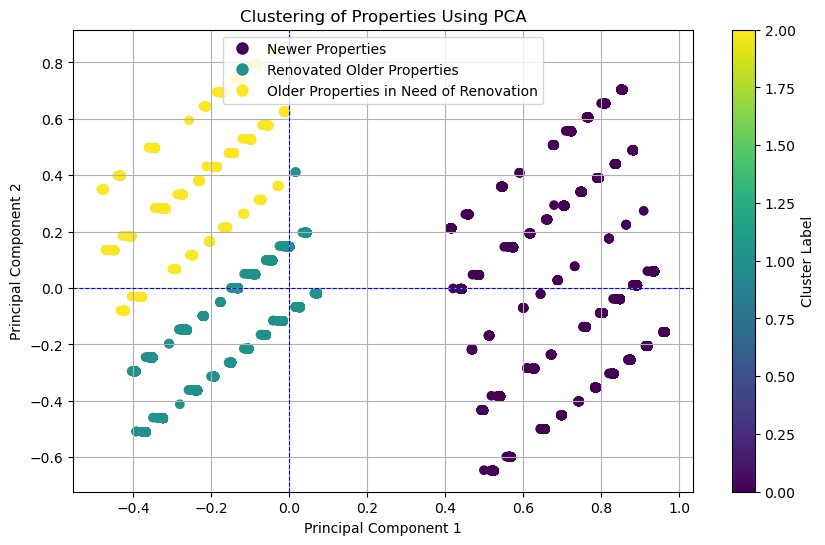

In [99]:
df_filtered = imputed_df[['yearConstructed', 'condition', 'interiorQual', 'lift']].copy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_filtered)

df_filtered['Cluster'] = clusters

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_filtered.drop('Cluster', axis=1))

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

plt.axhline(0, color='blue', linewidth=0.8, linestyle='--') 
plt.axvline(0, color='blue', linewidth=0.8, linestyle='--')

legend_labels = {
    0: "Newer Properties",
    1: "Renovated Older Properties",
    2: "Older Properties in Need of Renovation"
}

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(3)]
plt.legend(handles, [legend_labels[i] for i in range(3)], loc='best')

# Adding titles and labels
plt.title('Clustering of Properties Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


 # <div style="background-color: #cbd18f; color: #000000; font-size: 18px; padding: 5px;">2.3.5 Amenities and Facilities Clusters - Minimal, Modern and Luxory

</div>

This code performs K-means clustering on a dataset containing property features such as `balcony`, `hasKitchen`, `cellar`, `firingTypes`, `noParkSpaces`, `heatingType`, `garden`, and `lift`. The K-means algorithm is applied to create three clusters, which are visualized using Principal Component Analysis (PCA) to reduce the data to two dimensions. The scatter plot displays the properties in different clusters, color-coded as 'Newer Properties', 'Renovated Older Properties', and 'Older Properties in Need of Renovation'. The plot includes labeled axes for the principal components, a color bar for cluster labels, and horizontal and vertical lines at the origin for better visualization.<br>

1. **`Minimal Amenities`**  
- This cluster is concentrated near the bottom-right corner of the plot, where **PC1** and **PC2** values are generally higer.  
- This suggests these properties might lack features such as modern equipment, additional amenities, or luxury enhancements.  

2. **`Modern and Well-Equipped`**  
- Found prominently in the top-right quadrant, where **PC1** and **PC2** values are higher.  
- This likely indicates properties that balance newer designs with functional and contemporary features but without reaching luxury standards.  

3. **`Luxury`**  
- Positioned primarily in the middle-top region, with moderate to high **PC2** values.  
- These properties are likely equipped with premium features, advanced technologies, and superior design elements, standing out for their exclusivity.


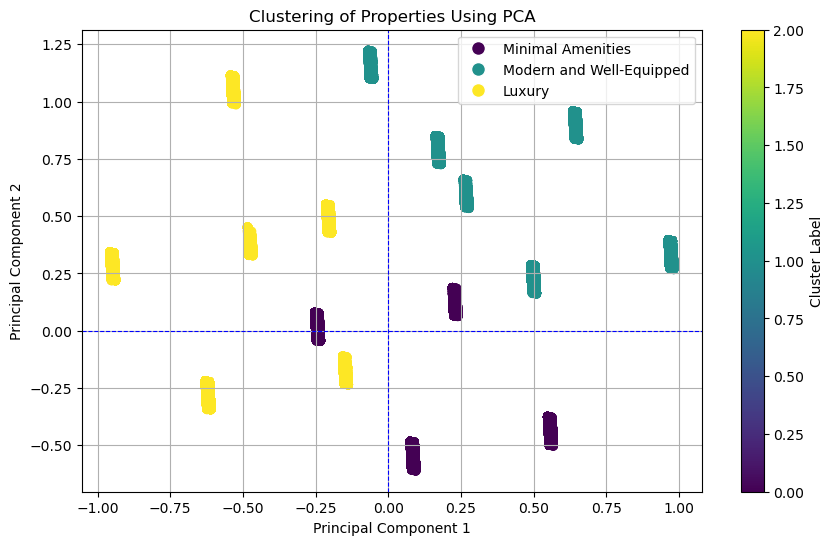

In [100]:
df_filtered = imputed_df[["balcony", "hasKitchen", "cellar", "firingTypes", "noParkSpaces", "heatingType", "garden", "lift"]].copy()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
clusters = kmeans.fit_predict(df_filtered)

df_filtered['Cluster'] = clusters

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_filtered.drop('Cluster', axis=1))

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

plt.axhline(0, color='blue', linewidth=0.8, linestyle='--')  
plt.axvline(0, color='blue', linewidth=0.8, linestyle='--')

legend_labels = {
    0: "Minimal Amenities",
    1: "Modern and Well-Equipped",
    2: "Luxury"
}

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10) for i in range(3)]
plt.legend(handles, [legend_labels[i] for i in range(3)], loc='best')

plt.title('Clustering of Properties Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

 # <div style="background-color: #1e847f; color: #ffffff; font-size: 18px; padding: 5px;">Conclusion

</div>

In this project, various machine learning algorithms were applied to regression, classification, and clustering tasks to analyze apartment rental data.

### Classification Analysis
For **Classification**, algorithms such as **Decision Trees** and **Random Forests** were tested to categorize apartments into predefined groups based on features like rent, living space, and amenities. The classification task demonstrated that the features used (such as living space, rent, and amenities) had a significant impact on the classification accuracy. Insights from this analysis are as follows:

- **Random Forest Classifier**: Provided strong results with high precision and recall for categorizing properties correctly into 'Luxury', 'Mid-Range', and 'Budget' categories.
- **Decision Tree Classifier**: Showed reasonable performance but with some overfitting on training data, leading to lower generalization on the test set compared to Random Forest.
- The classification models were able to segment the data effectively, identifying patterns in apartment rental categories, which can assist in decision-making for renters and property managers.

### Regression Results
For regression, models such as **Linear Regression**, **Random Forest Regressor**, **Polynomial Regression with XGBoost**, and **Support Vector Regression (SVR)** were employed to predict rental prices based on features like base rent, living space, and year constructed. 
- The **Random Forest Regressor** showed the strongest performance, with an R² of 0.752 on the training data and 0.708 on the test data, indicating a good fit and ability to generalize well.
- The **SVR with a linear kernel** had the weakest performance, with R² values of around 0.676 and 0.672 for the training and test data, respectively, suggesting moderate accuracy in explaining variance.
- The **Linear Regression** model performed decently, with an R² of 0.685 on training and 0.680 on the test set, indicating it captured some of the underlying data trends but left a significant portion of unexplained variance.
- The **Polynomial Regression using XGBoost**, though not the best, showed solid performance with R² values of around 0.739 and 0.722 for the training and test sets, demonstrating its ability to capture non-linear relationships in the data.

### Clustering Results
In terms of clustering, **K-means** was applied to identify patterns in apartment rental features. The clusters generated included:
- **Budget**, **Mid Range**, and **Luxury** apartments based on base rent and living space.
- Further clustering, using features such as year constructed and service charges, categorized apartments into groups like **Mid-Tier Family Living**, **City Center Compact Living**, and **Executive Residences**.

The results were visualized using **PCA**, highlighting how different features such as property age, rent, and amenities influenced the clustering. The clustering analysis showed how apartment offerings varied from affordable units to high-end luxury properties.

### Insights
- The **Random Forest Regressor** provided the best results in regression tasks, with strong generalization and good predictive ability, while the **SVR** model was the least effective.
- Insights from the clustering analysis underscored the importance of property features like rent, size, and amenities in determining property categories, which could help renters and property managers make more informed decisions.
- The **Random Forest Classifier** demonstrated strong performance in categorizing apartments into different market segments, providing further value to the analysis by clearly identifying 'Luxury', 'Mid-Range', and 'Budget' apartments based on key features.

Overall, the project demonstrates the effectiveness of machine learning models for both regression, classification, and clustering tasks in analyzing apartment rental data.
